
# Analyse de données de gravimètres.

_Extrait du sujet d'examen posé en 2021/2022_

Un gravimètre est un appareil qui mesure l'accélération de la pesanteur. A Paris, elle vaut $g\sim 9.81$ m/s$^2$. Dans cet exercice nous allons analyser des données provenant du gravimètre à atomes froids du laboratoire LNE-SYRTE (à Paris) et celles provenant d'un gravimètre à supraconducteur qui ont été enregistrées en parallèle, pendant 27 jours, entre le 7 avril et le 4 mai 2015. Le gravimètre à atomes froids (CAG, cold atoms gravimeter) est un gravimètre dit absolu dans le sens où il mesure $g$ directement en m/s$^2$. Le gravimètre à supraconducteur ('iGRAV') est un gravimètre dit relatif dans le sens où il mesure une tension en V qui peut être reliée à $g$. Ce dernier doit donc être calibré. Ceci peut justement se faire à l'aide du CAG. C'est ce que nous allons faire dans un premier temps.


Vous trouverez un fichier texte {download}`data/CAGiGrav.txt` dans le dossier data qui contient : la date (en [jour Julien modifié](https://fr.wikipedia.org/wiki/Jour_julien) 'MJD'), la mesure du gravimètre (en nm/s$^2$, par rapport à la valeur $g = 9.808~907~500$ m/s$^2$), la mesure de l'iGRAV (en V) et le résidu entre les deux mesures après étalonnage de l'iGRAV (en nm/s$^2$). Ce contenu est séparé par des ``'tabulations'``. La première ligne correspond à l'en-tête. 



1. Importer le fichier  ``'CAGiGRAV.txt'`` et créer quatres tableaux de flottants (``float``) correspondant à la date, la mesure du CAG, celle de l'iGRAV et le résidu après calibration. On pourra utiliser la fonction ``np.loadtxt()`` dont les arguments peuvent être retrouvés à partir de sa documentation : il faudra savoir 1/ comment utiliser le ``\t`` comme séparateur et 2/ comment éliminer la première ligne (en-tête) du fichier.

In [1]:
import numpy as np

MJD, CAG, iGRAV, RES = np.loadtxt('data/CAGiGrav.txt', delimiter='\t', skiprows=1, unpack=True)

2. Tracer l'évolution de l'accélération de la pesanteur en fonction de la date (en MJD) mesurée à l'aide du CAG et à l'aide du iGRAV. On pourra utiliser la fonction ``plt.subplots`` dont les arguments peuvent être retrouvés à partir de sa documentation : notamment un des arguments permettra de partager l'axe des abscisses.

Le résultat typique que l'on observe est le suivant: 

![alt text](gcagigrav.png "Title")

Les variations de grandes amplitudes et de longues périodes sont liées à l'attraction de la lune et du soleil (phénomène des marées). Dans ce graphique, les unités sont en Gal. 1 µGal = 1 nm/s$^2$.


Text(0, 0.5, 'iGRAV (V)')

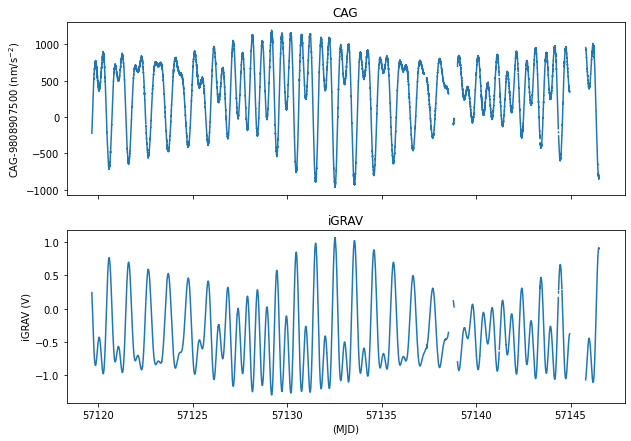

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,7))
ax[0].plot(MJD,CAG)
ax[0].set_ylabel(r'CAG-9808907500 (nm/s$^{-2}$)')
ax[0].set_title('CAG')
ax[1].plot(MJD,iGRAV)
ax[1].set_title('iGRAV')
ax[1].set_xlabel('(MJD)')
ax[1].set_ylabel('iGRAV (V)')

Comme pour beaucoup de jeux de données expérimentales, il manque des données (ici soit parce que les mesures ont été perturbées par des tremblements de terre soit parce que l'asservissement des lasers (servant au refroidissement laser des atomes) du gravimètre atomique a sauté). Ces données manquantes sont représentées par des 'nan' (not a number). 

La fonction ``np.isnan`` permet de créer un tableau de booléen contenant les nombres qui sont des 'nan'. Le code suivant permet de creer un masque (tableau de booléen) contenant uniquement les données valides en même temps pour les deux gravimètres: 

In [3]:
mask = ~(np.isnan(CAG) | np.isnan(iGRAV))

3. Pourquoi avoir utilisé ``~`` et ``|`` au lieu de ``not`` et ``or`` ?

In [4]:
# Ce que l'on ne fait pas
# mask = not(np.isnan(CAG) or np.isnan(GRAV)) 

# le ~ et le | effectue l'opération point par point sur le tableau.  Le not ou or ne fonctionne que avec des
# booléens

4. Quelle était la valeur moyenne et l'écart type de $g$ entre le 7 avril et le 4 mai 2015 (c'est à dire sur l'ensemble des données) ?

In [5]:
print(f"La valeur moyenne de g est de {(np.mean(CAG[mask])+9808907500)*1e-9:.9f} m/s2 avec un écart type de {np.std(CAG[mask]):.1f} nm/s2")

La valeur moyenne de g est de 9.808907857 m/s2 avec un écart type de 464.6 nm/s2


Les données de l'iGRAV sont données en volt.  On note $K$ le coeficient de calibration de l'instrument (en nm.s$^{-2}$/V). On prendra $K=-898.25$nm.s$^{-2}$/V.

5. Calculer et tracer la différence entre les mesures enregistrées par le CAG et celles enregistrées par l'iGRAV après calibration: CAG-K*iGRAV. Vérifier graphiquement que votre résultat correspond bien à la quatrième colonne du fichier ``'CAGiGRAV.txt'``. 

Text(0.5, 0, '(MJD)')

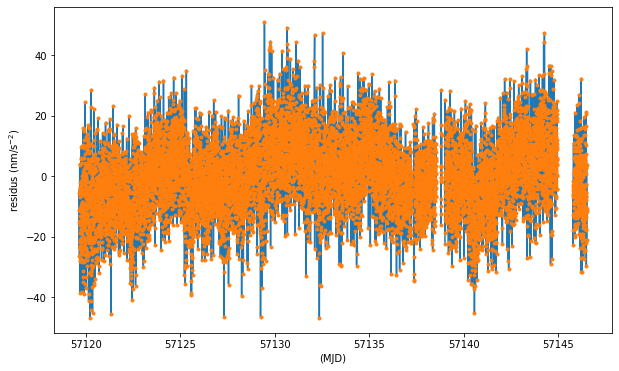

In [6]:
K = -898.25
residu = CAG-K*iGRAV

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(MJD, residu)
ax.plot(MJD, RES,'.')
ax.set_ylabel(r'residus (nm/s$^{-2}$)')
ax.set_xlabel('(MJD)')


6. Quel est l'écart type de ces résidus sur la période des 27 jours de mesures ? Comparer celui-ci avec l'écart type des mesures du gravimètre atomique (CAG) seules, calculées à la question 4. Commenter.

In [7]:
print(f"L'écart type du résidu vaut {np.std(residu[mask]):.1f} nm/s2")


L'écart type du résidu vaut 11.8 nm/s2



L'écart type des mesures du CAG seules est dominée par des variations de longues périodes qui se retrouvent 
aussi sur la mesure de l'iGRAV. Ces variations sont donc indépendantes de l'appareil et sont 'corrigées' 
lorsqu'on fait la différence des mesures obtenues avec les deux gravimètres

Grâce au gravimètre à supraconducteur, il a été possible d'éliminer les variations dues aux effets des marées et d'en déduire le bruit du CAG (le bruit de l'iGRAV est négligeable en comparaison). Lorsque l'on n'a pas cet appareil (l'IGRAV), il est possible de caractériser le bruit de l'instrument (le CAG) grace à un outils mathématique appelé **la variance d'Allan**. L'idée est que entre deux mesures consécutives, le signal varie peu et que seul le bruit de l'instrument va changer le résultat. 

La variance d'Allan est définie par : 

$$\sigma_\mathrm{Allan}^2 = \frac{1}{2} \left<\left(x_{l+1} - x_l\right)^2\right>_l$$

7. (facultative) Question de statistique: vérifier que si les $x_i$ sont indépendants, $\sigma_\mathrm{Allan}$ correspond à l'écart type des $x$.

On note :
\begin{equation}
\mu = \left<x_{l+1}\right> =  \left<x_l\right>
\end{equation}

On peut alors dire que :
\begin{equation}
\sigma_\mathrm{Allan}^2 = \frac{1}{2} \left<\left((x_{l+1} - \mu) - (x_l - \mu)\right)^2\right>_l
\end{equation}

\begin{equation}
\sigma_\mathrm{Allan}^2 = \frac{1}{2} \left( 
\left<\left(x_{l+1} - \mu\right)^2\right>_l + 
\left<\left(x_{l} - \mu\right)^2\right>_l + \left<\left(x_{l+1} - \mu\right)\left(x_{l} - \mu\right)\right>_l
\right)
\end{equation}


Les deux premiers termes correspondent à la variance standard. Le troisième est nul dans le cas où les $x_i$ sont indépendants. CQFD

8. Écrire une fonction ``allan_variance(x)`` qui calcule la variance d'Allan d'un jeu de données x. Bien que ce ne soit pas exactement le cas, nous allons ici supposer que chaque mesure du CAG est réalisée pendant un temps $\tau_0=177$ s. Calculer **l'écart type d'Allan** $\sigma_{Allan}(\tau_0)$ du jeu de données du CAG et vérifier que l'on a le même ordre de grandeur qu'à la question 6.

8. (bis) Si ce n'est pas déjà fait, écrire la fonction ``allan_variance(x)`` sans boucle for.

In [8]:
def allan_variance(x):
    return 1/2*np.mean((x[1:]-x[:-1])**2)

cag_allan_std = np.sqrt(allan_variance(CAG[mask]))
igrav_allan_std = np.sqrt(allan_variance(iGRAV[mask]))

print("Écart type d'Allan de la mesure de g")
print(f"- Gravimètre atomique : {cag_allan_std:5.1f} nm/s2")
print(f"- iGRAV               : {igrav_allan_std:5.3f} nm/s2")



Écart type d'Allan de la mesure de g
- Gravimètre atomique :  13.5 nm/s2
- iGRAV               : 0.010 nm/s2


Ceci montre que le bruit provient bien du gravimètre atomique. 
Ce qui pouvait se voir sur les courbes de la question 2.